In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 코랩 사용시

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.getcwd()

'/content'

코랩 사용시 본인 구글 드라이브 경로는  
/content/drive/MyDrive/...  
입니다.

In [4]:
path = '/content/drive/MyDrive/DSL/정규세션/220203 Supervised Learning'    # 과제 데이터셋이 저장된 경로를 더 작성해주세요
os.chdir(path)

In [5]:
os.getcwd()

'/content/drive/MyDrive/DSL/정규세션/220203 Supervised Learning'

## 아파트 전월세 가격 회귀 모델

2020년 전국의 아파트 전월세 거래 데이터셋을 활용합니다.  
해당 데이터셋에서 전세 거래와 월세 거래를 구분한 후,  
보증금 혹은 월세에 가장 큰 영향을 미치는 feature를 찾아  
선형회귀 모델을 세우려고 합니다.

1) Apartment_train.csv, Apartment_test.csv 파일을  
apart_train, apart_test 라는 변수에 DataFrame 형태로 불러와주세요.

In [6]:
apart_train =pd.read_csv('/content/drive/MyDrive/DSL/정규세션/220203 Supervised Learning/Apartment_train.csv')
apart_test = pd.read_csv('/content/drive/MyDrive/DSL/정규세션/220203 Supervised Learning/Apartment_test.csv')

In [7]:
apart_train.head()

,시군구,단지명,전월세구분,전용면적(㎡),보증금(만원),월세(만원),층,건축년도
0,대구광역시,트윈팰리스,전세,84.1500,32000,0,13,2006
1,부산광역시,삼익비치,전세,73.9200,12000,0,8,1979
2,대구광역시,동대구반도유보라,월세,39.7596,1000,54,11,2018
3,대전광역시,주공1단지아파트,월세,26.3700,579,8,4,1993
4,광주광역시,선운지구진아리채,전세,78.0887,27000,0,1,2014


2) apart 데이터셋에서 월세와 전세를 구분하여  
다음과 같은 4개의 변수에 할당하려고 합니다.  

- train set에서 월세_train, 전세_train  
 test set에서 월세_test, 전세_test  

이에 해당하는 코드를 작성해주세요.


In [8]:
월세_train = apart_train[apart_train['전월세구분']=='월세']
전세_train = apart_train[apart_train['전월세구분']=='전세']

월세_test = apart_test[apart_test['전월세구분']=='월세']
전세_test =  apart_test[apart_test['전월세구분']=='전세']

In [9]:
월세_train.head()

,시군구,단지명,전월세구분,전용면적(㎡),보증금(만원),월세(만원),층,건축년도
2,대구광역시,동대구반도유보라,월세,39.7596,1000,54,11,2018
3,대전광역시,주공1단지아파트,월세,26.3700,579,8,4,1993
5,충청북도,중흥마을부영(2542-0),월세,59.9870,2000,50,4,2003
6,서울특별시,래미안길음센터피스,월세,33.4600,2767,4,7,2019
7,경상북도,계림시영,월세,49.2000,1700,30,7,1993


3) 이후 작업부터는 따로 언급이 없을 경우  
위에서 생성한 4개의 DataFrame 중  
train set만 이용하여 작업을 수행합니다.  

'월세'의 경우 월세 가격에,  
'전세'의 경우 보증금 가격에 
영향을 가장 많이 미치는 feature를 찾고자 합니다.  

다양한 방법을 동원해서,  
해당하는 feature를 '1개만' 찾아주세요.  

아마도 '월세'와 '전세' 두 경우에서 모두 같은 feature가 나올 것입니다.  

(hint: 상관계수행렬이나 산점도 이용)

In [10]:
월세_train.corr()

,전용면적(㎡),보증금(만원),월세(만원),층,건축년도
전용면적(㎡),1.000000,0.379900,0.473753,0.122702,0.044748
보증금(만원),0.379900,1.000000,0.132703,0.131093,0.156173
월세(만원),0.473753,0.132703,1.000000,0.132955,0.044431
층,0.122702,0.131093,0.132955,1.000000,0.252621
건축년도,0.044748,0.156173,0.044431,0.252621,1.000000


월세에 가장 큰 영향을 미치는 것은 전용면적으로 확인 됐습니다.

In [11]:
전세_train.corr()

,전용면적(㎡),보증금(만원),월세(만원),층,건축년도
전용면적(㎡),1.000000,0.533033,NaN,0.146494,0.190064
보증금(만원),0.533033,1.000000,NaN,0.185872,0.227700
월세(만원),NaN,NaN,NaN,NaN,NaN
층,0.146494,0.185872,NaN,1.000000,0.266430
건축년도,0.190064,0.227700,NaN,0.266430,1.000000


전세 train데이터 에서, 보증금에 가장 큰 영향을 주는 변수 역시 전용면적이었습니다.


4) 위에서 찾은 feature를 이용해(이하 X라 칭함)  
'월세'의 경우 월세 가격(이하 y1),  
'전세'의 경우 보증금 가격(이하 y2)  
을 예측하는 모델을 세울 것입니다.

첫번째, 월세 가격을 예측하는 모델을 구축합니다.  
**파이프라인을 사용하지 않고** 작업합니다.  
수행해야할 작업은 다음과 같습니다.  
- 데이터를 scaling 합니다.  
 StandardScaler를 사용합니다.(변수명은 scaler)  
- X와 y1의 관계를 나타내는 선형회귀 모델을 구축합니다.  
LinearRegression Estimator(변수명은 lin_reg_1)를 사용합니다.

In [12]:
# 관련 모듈 import
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

In [13]:
# input 데이터는 X_train, target 데이터는 y1_train 변수에 할당
X_train = 월세_train['전용면적(㎡)']
X_train = X_train[:,np.newaxis]
y1_train = 월세_train['월세(만원)']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
# 데이터 scaling 하기
# X 데이터만 scailing 하며,
# 기존 X_train 변수에 덮어씌웁니다.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.96192644],
       [-1.55772264],
       [-0.06186906],
       ...,
       [-0.06218054],
       [-0.31314327],
       [ 0.86139792]])

In [15]:
# 선형회귀 모델 생성 후 fitting 시킵니다.
lin_reg_1 = LinearRegression()

In [16]:
lin_reg_1.fit(X_train,y1_train)

LinearRegression()

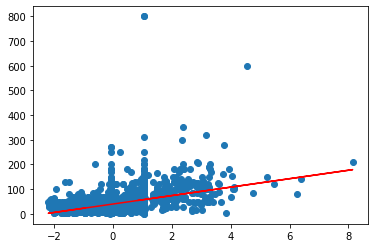

In [17]:
# 시각화. 체크용입니다.
plt.scatter(X_train[:, 0], y1_train)
plt.plot(X_train[:, 0], 
         lin_reg_1.predict(X_train), 
         c='r');

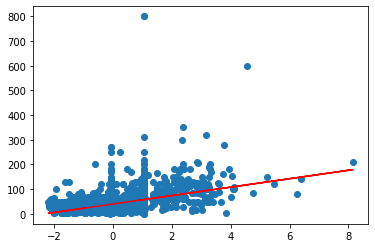

테스트셋, 즉 '월세_test'와  
이미 fitting된 모델을 이용해 predict를 수행합니다.  
y1_hat 이라는 변수에 '월세_test'를 predict한 값을 할당합니다.

In [18]:
# input 데이터는 X_test, target 데이터는 y1_test 변수에 할당
X_test = 월세_test['전용면적(㎡)']
y1_test = 월세_test['월세(만원)']

In [19]:
# X_test 역시 정규화 해주어야 합니다. 주의할점?
X_test = X_test[:,np.newaxis]
X_test = scaler.fit_transform(X_test)
X_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


array([[-0.72073883],
       [-0.68863367],
       [-0.67979312],
       ...,
       [ 0.85985834],
       [-0.52950378],
       [ 0.49413877]])

In [20]:
# y1_hat에 predict값 할당
y1_hat = lin_reg_1.predict(X_test)

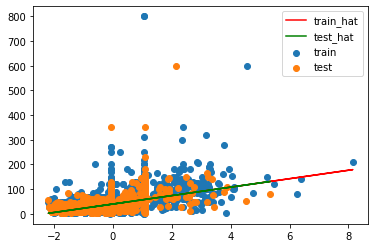

In [21]:
# 시각화. 체크용입니다.
plt.scatter(X_train[:, 0], y1_train, label='train')
plt.scatter(X_test[:, 0], y1_test, label='test')

plt.plot(X_train[:, 0], 
         lin_reg_1.predict(X_train), 
         c='r', label='train_hat')
plt.plot(X_test[:, 0], 
         y1_hat, 
         c='g', label='test_hat')

plt.legend();

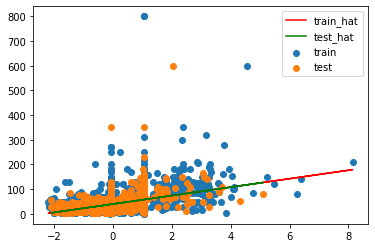

두번째, 전세 보증금 가격(y2) 예측 모델을 구축합니다.  
**파이프라인을 사용하여** 만듭니다. 
파이프라인 이름은 p1으로 정하고,  
수행해야할 작업은 다음과 같습니다.  
- 데이터를 scaling 합니다.  
StandardScaler를 사용합니다.(변수명은 scaler)  

- 다항 특성을 만들 것입니다.  
PolynomialFeatrues 변환기를 사용하며,  
차수는 자유이고 bias는 없습니다.(변수명은 poly)  

- X와 y2의 관계를 나타내는 Ridge 모델을 구축합니다.  
Ridge Estimator를 사용하며, hyperparameter는 자유롭게 설정합니다.  
(변수명은 rdg_reg_1)

In [22]:
# 관련 모듈 import
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [23]:
# 파이프라인 생성
p1 = Pipeline([
               ('poly', PolynomialFeatures(degree=2, include_bias=False)),
               ('scaler', StandardScaler()),
               ('rdg_reg_1', Ridge(alpha=0.2))
])

In [24]:
# input 데이터는 X_train, target 데이터는 y2_train 변수에 할당
X_train = 전세_train['전용면적(㎡)']
X_train= X_train[:,np.newaxis]
y2_train = 전세_train['보증금(만원)']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
# 파이프라인 fitting
p1.fit(X_train, y2_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('rdg_reg_1', Ridge(alpha=0.2))])

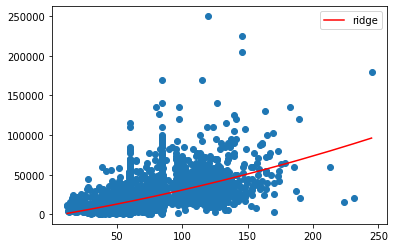

In [26]:
# 시각화. 체크용입니다.
# degree=5, alpha=0.5 적용하였을 경우
plt.scatter(X_train[:, 0], y2_train)
plt.plot(np.sort(X_train[:, 0]), 
         np.sort(p1.predict(X_train)), 
         c='r', label='ridge')
plt.legend();

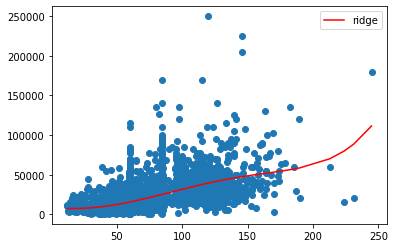

수고하셨습니다.